
# Assignment No 4c
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

## TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

-10.771172845400764


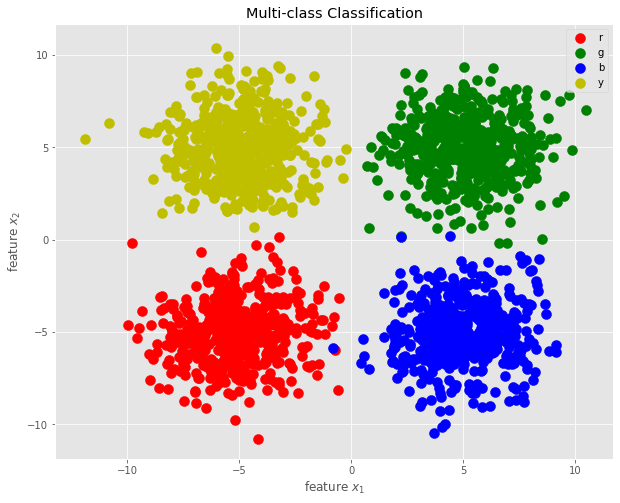

In [7]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples//4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples//4,1)),2*np.ones((nexamples//4,1)),3*np.ones((nexamples//4,1)),4*np.ones((nexamples//4,1))))

print(x1.min())
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples//4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples//4,1)),2*np.ones((ntexamples//4,1)),3*np.ones((ntexamples//4,1)),4*np.ones((ntexamples//4,1))))


In [8]:
import randomForest as rf

In [9]:
rfc=rf.RandomForest(weaklearner='Linear')

In [ ]:
print (X.shape, Y.shape)

In [17]:
%pdb
rfc.train(X,Y)


Automatic pdb calling has been turned ON


In [16]:
len(rfc.trees)

0

In [10]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,494,0,3,3,500
2.0,0,499,0,1,500
3.0,0,1,499,0,500
4.0,1,2,0,497,500
All,495,502,502,501,2000


In [11]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

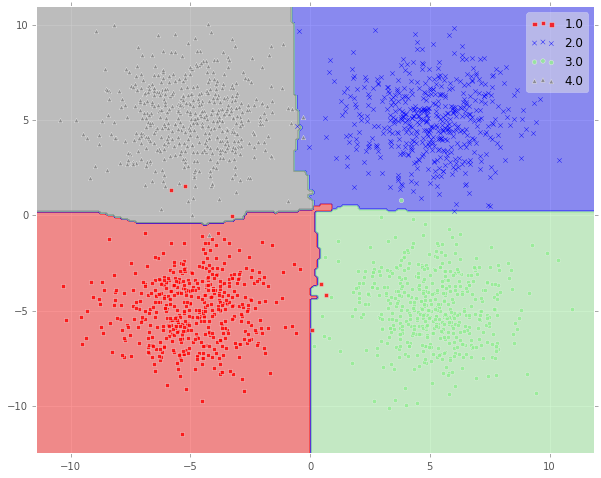

In [12]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [13]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,249,0,0,1,250
2.0,0,250,0,0,250
3.0,1,1,248,0,250
4.0,1,2,0,247,250
All,251,253,248,248,1000


In [14]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

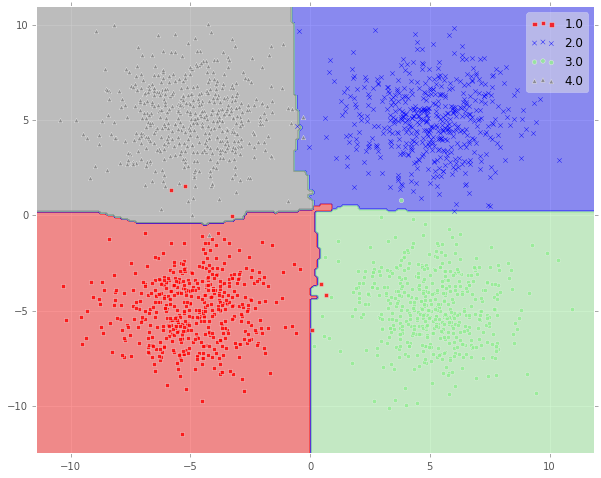

In [15]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned ON
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


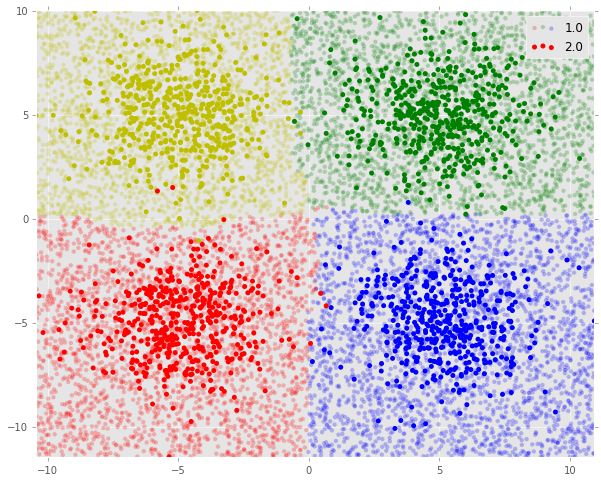

In [16]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

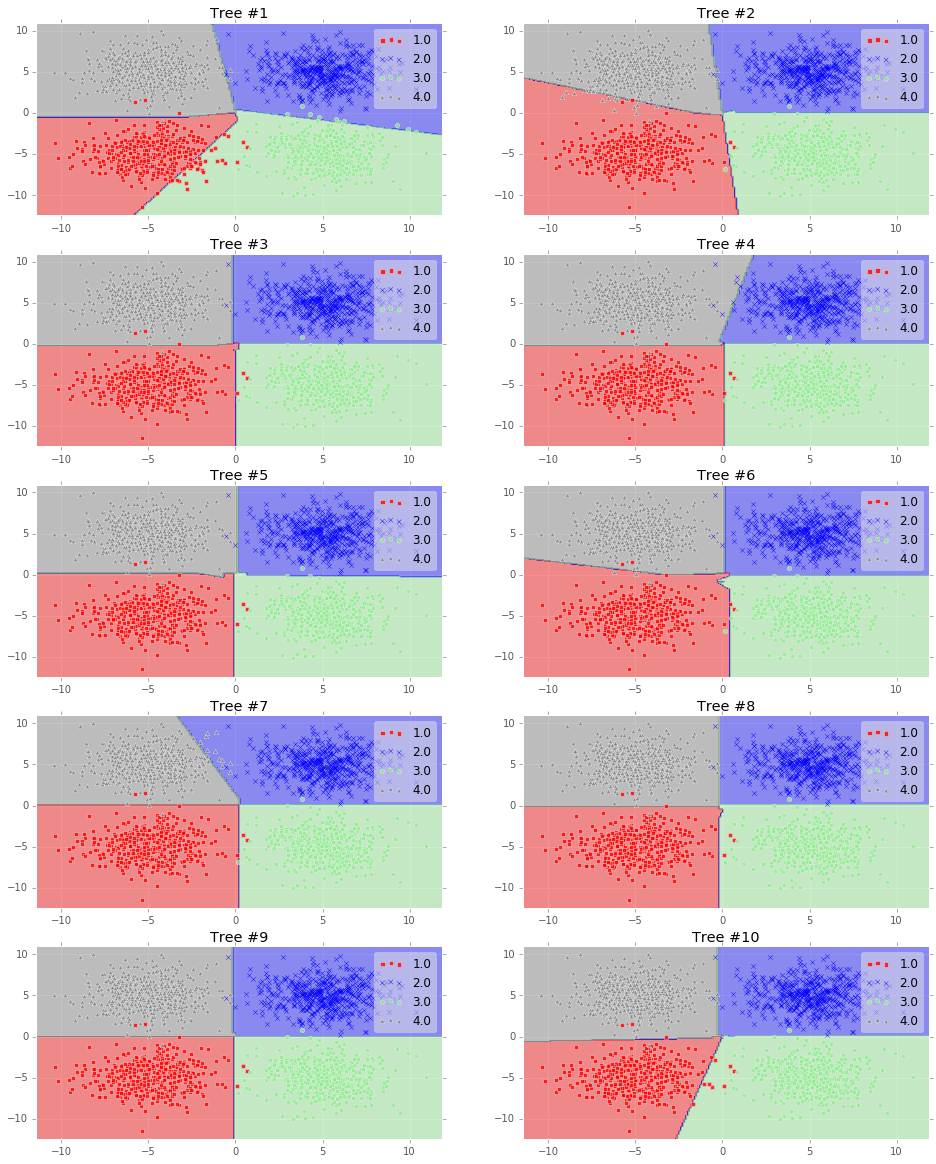

In [17]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

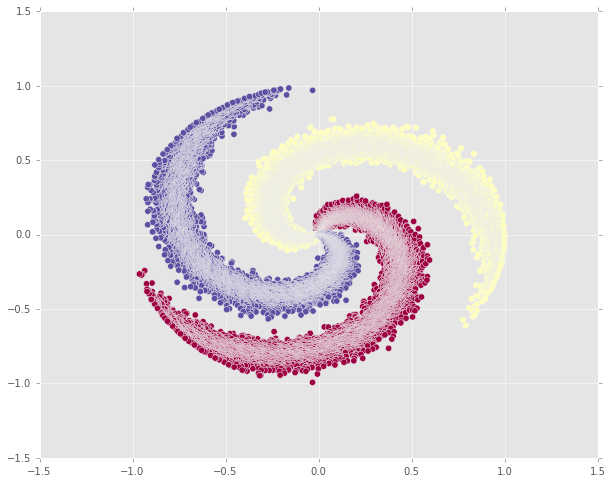

In [18]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)


In [19]:
print X.shape, Y.shape

(30000, 2) (30000,)


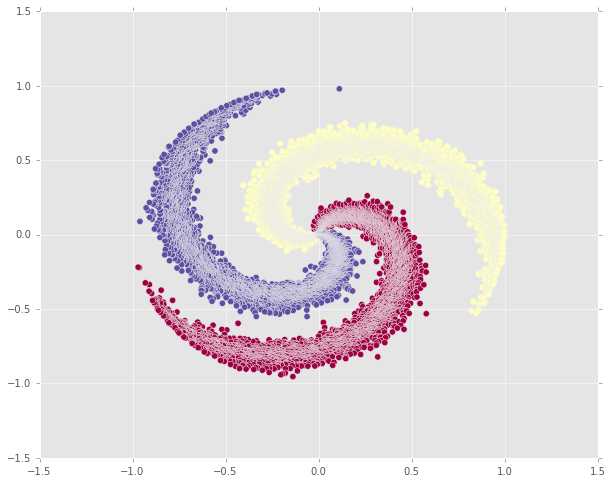

In [20]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [21]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

Creating Left Child Node With 7616 Examples, and Right Node with 22384 Examples
Creating Left Child Node With 3593 Examples, and Right Node with 4023 Examples
Creating Left Child Node With 2384 Examples, and Right Node with 1209 Examples
Creating Left Child Node With 1968 Examples, and Right Node with 416 Examples
Creating Child Node With ClassLabel=0, nexamples=1968, classes=[(0, 1968)]
Creating Child Node With ClassLabel=0, nexamples=416, classes=[(0, 403), (1, 13)]
Creating Left Child Node With 696 Examples, and Right Node with 513 Examples
Creating Child Node With ClassLabel=0, nexamples=696, classes=[(0, 696)]
Creating Child Node With ClassLabel=1, nexamples=513, classes=[(1, 513)]
Creating Left Child Node With 976 Examples, and Right Node with 3047 Examples
Creating Left Child Node With 0 Examples, and Right Node with 976 Examples
Creating Child Node With ClassLabel=0, nexamples=976, classes=[(0, 976)]
Creating Left Child Node With 6 Examples, and Right Node with 3041 Examples
Cr

In [22]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9847,14,139,10000
1,533,9467,0,10000
2,798,51,9151,10000
All,11178,9532,9290,30000


In [23]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4927,4,69,5000
1,282,4718,0,5000
2,404,24,4572,5000
All,5613,4746,4641,15000


In [24]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0, 1, 2]


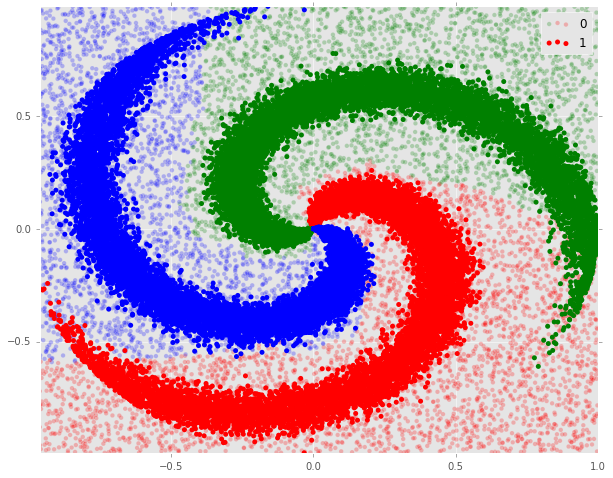

In [25]:
t.plot_points_range(rfc,X,Y)

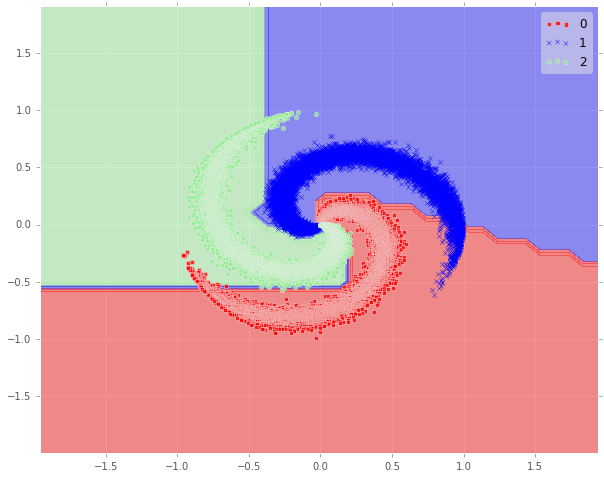

In [26]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

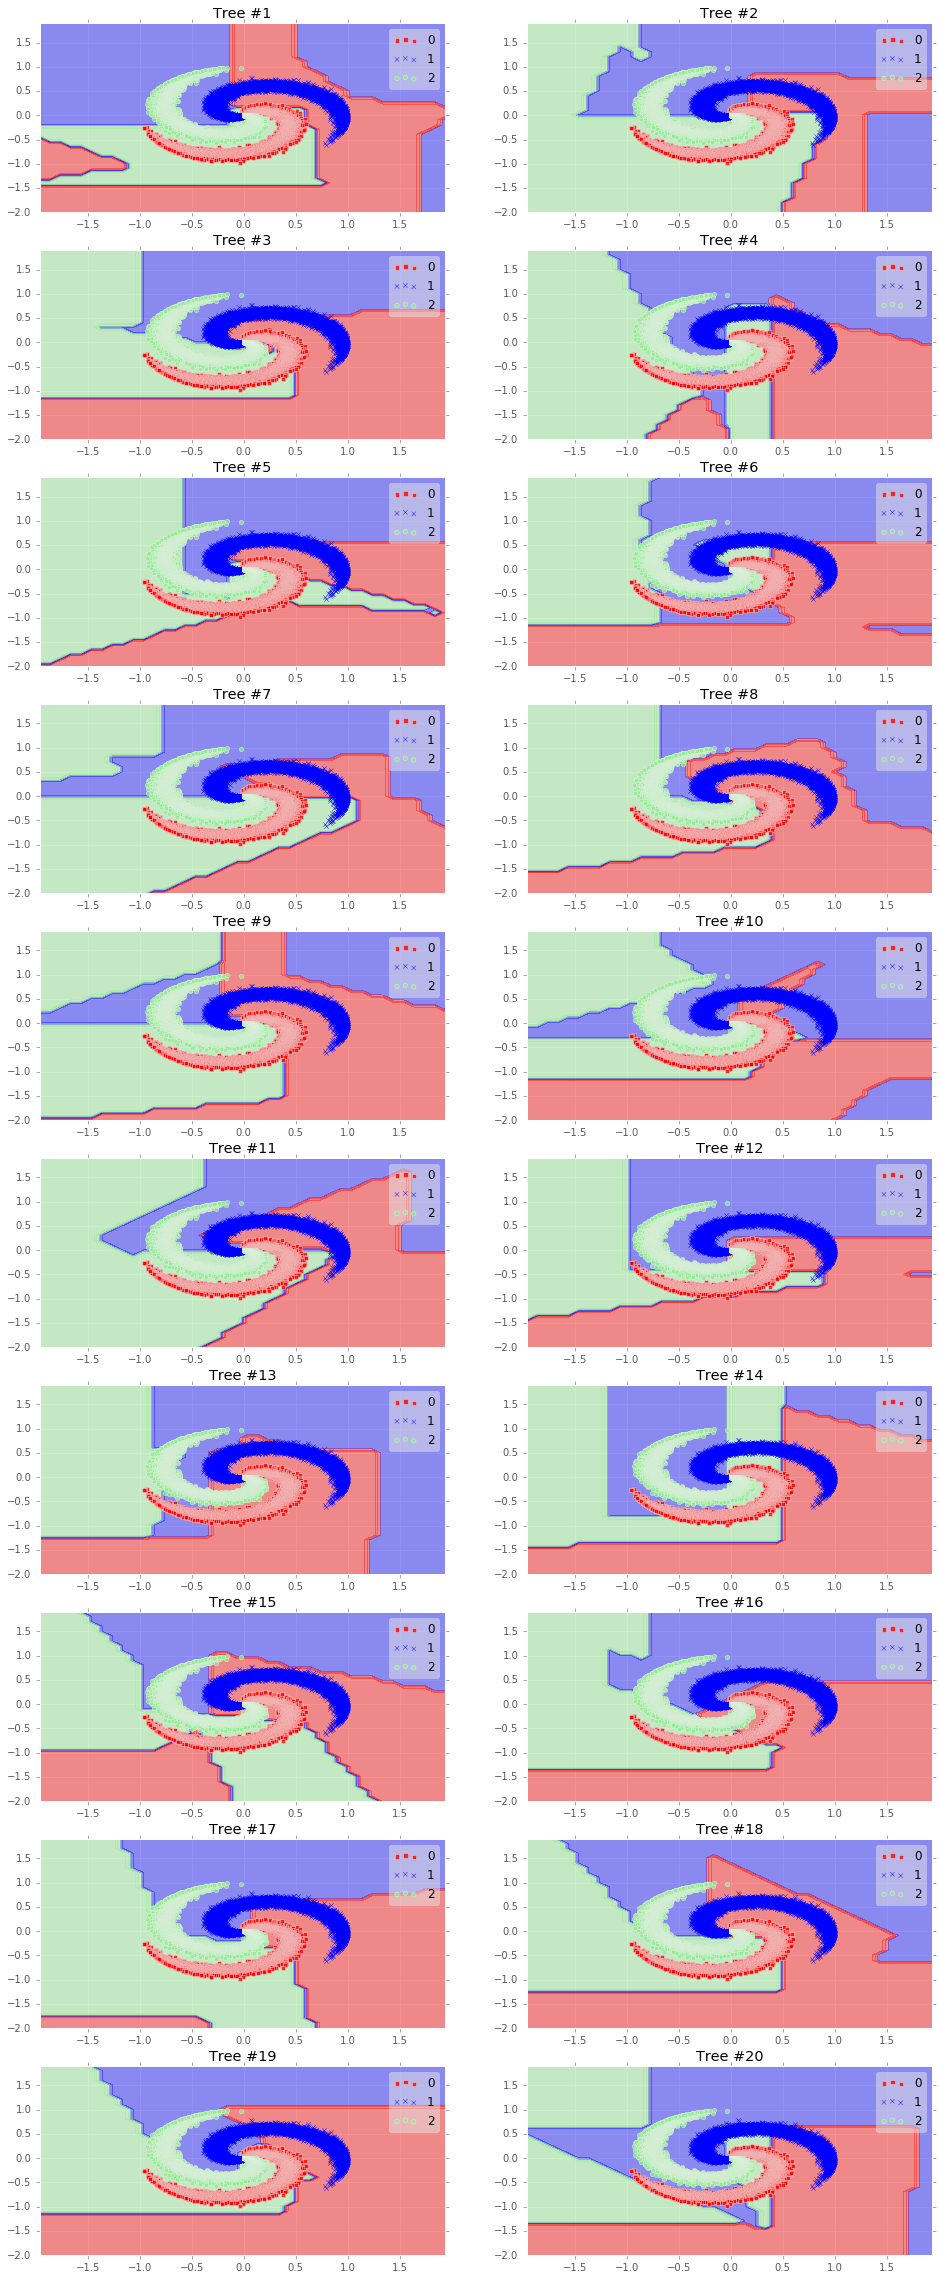

In [27]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...